In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fifa= pd.read_csv('fifa21_train.csv')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
fifa.dtypes

ID                    int64
Name                 object
Age                   int64
Nationality          object
Club                 object
BP                   object
Position             object
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions             int64
Balance             

In [4]:
fifa.isna().sum()

ID                      0
Name                    0
Age                     0
Nationality             0
Club                   18
BP                      0
Position              288
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 41
Loan Date End       11072
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                41
Skill                   0
Dribbling               0
Curve                  41
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                41
Reactions               0
Balance                41
Power                   0
Shot Power              0
Jumping     

In [5]:
fifa.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [6]:
#creating Age Groups column
bins = [15, 20, 25, 30, 35, float('inf')]
labels = ['15-20', '20-25', '25-30', '30-35', 'Above 35']
fifa['Age Group'] = pd.cut(fifa['Age'], bins=bins, labels=labels, right=False)

In [7]:
fifa['A/W'].unique()

array(['High', 'Medium', 'Low', nan], dtype=object)

In [8]:
fifa['D/W'].unique()

array(['Medium', 'Low', 'High', nan], dtype=object)

In [9]:
#changing A/W & D/W into numerical
mapping = {'High': 3, 'Medium': 2, 'Low': 1, np.nan: 2}
columns_to_replace = ['A/W', 'D/W']
fifa[columns_to_replace] = fifa[columns_to_replace].replace(mapping)


In [10]:
#replacing the K, M and € sign with ''
fifa['Value'] = fifa['Value'].str.replace('K', '').str.replace('M', '').str.replace('€', '')
fifa['Wage'] = fifa['Wage'].str.replace('K', '').str.replace('M', '').str.replace('€', '')
fifa['Release Clause'] = fifa['Release Clause'].str.replace('K', '').str.replace('M', '').str.replace('€', '')
fifa['Hits'] = fifa['Hits'].str.replace('K', '').str.replace('M', '')

In [11]:
#removing the stars
for column in fifa[['W/F', 'SM', 'IR']]:
    fifa[column] = fifa[column].str.rstrip('★').astype('int64')


In [12]:
#calculating the values in positions
def replace_values(value):
    if isinstance(value, str) and '+' in value:
        parts = value.split('+')
        return sum(int(part) for part in parts)
    else:
        return value
fifa = fifa.applymap(replace_values)
fifa.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Age Group
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,525,4,801,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,3.0,2.0,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64,25-30
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",8.5,23,0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,3.0,1.0,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77,30-35
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,9,49,15.3,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,3.0,2.0,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80,30-35
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,275,4,694,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,2.0,2.0,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59,20-25
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,725,2,1.4,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1.0,2.0,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65,20-25


In [13]:
columns_change = ['PAC','SHO','PAS','DRI','DEF','PHY','Hits','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK','Attacking','Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Skill','Dribbling','Curve','FK Accuracy','Long Passing','Ball Control','Movement','Acceleration','Sprint Speed','Agility','Reactions','Balance','Power','Shot Power','Jumping','Stamina','Strength','Long Shots','Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Defending','Marking','Standing Tackle','Sliding Tackle','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK','Positioning','GK Reflexes','Total Stats','Base Stats', 'D/W', 'A/W', 'W/F', 'SM', 'IR']

In [14]:
fifa['Hits']=fifa['Hits'].astype(float)

In [15]:
fifa['Value']=fifa['Value'].astype(float)

In [16]:
fifa['Wage']=fifa['Wage'].astype(float)

In [17]:
fifa['Release Clause']=fifa['Release Clause'].astype(float)

In [18]:
#extracting numerical df from fifa
numfifa = fifa.select_dtypes(include=['float64', 'int64'])
numfifa = numfifa.drop(columns=['Age'])

In [19]:
numfifa.head()

,ID,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,1,525.0,4.0,801.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,3.0,2.0,1,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,188044,0,8.5,23.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,3.0,1.0,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,184431,0,9.0,49.0,15.3,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,3.0,2.0,2,80,77,78,86,27,56,73.0,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,233796,13,275.0,4.0,694.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,2.0,2.0,1,57,44,54,57,57,60,7.0,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,234799,8,725.0,2.0,1.4,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1.0,2.0,1,66,44,60,64,60,66,4.0,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65


In [20]:
numfifa.isnull().sum()

ID                    0
Growth                0
Value                 0
Wage                  0
Release Clause        0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              41
Skill                 0
Dribbling             0
Curve                41
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              41
Reactions             0
Balance              41
Power                 0
Shot Power            0
Jumping              41
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               41
Penalties             0
Composure           279
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       41
Goalkeeping           0
GK Diving       

In [21]:
#replacing Null values with the mean
numfifa.fillna(numfifa.mean(), inplace=True)

In [22]:
numfifa.isnull().sum()

ID                  0
Growth              0
Value               0
Wage                0
Release Clause      0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexe

In [23]:
numfifa.drop_duplicates(keep=False, inplace=True)

In [24]:
numfifa.head()

,ID,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,1,525.0,4.0,801.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,3.0,2.0,1,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,188044,0,8.5,23.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,3.0,1.0,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,184431,0,9.0,49.0,15.3,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,3.0,2.0,2,80,77,78,86,27,56,73.0,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,233796,13,275.0,4.0,694.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,2.0,2.0,1,57,44,54,57,57,60,7.0,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,234799,8,725.0,2.0,1.4,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1.0,2.0,1,66,44,60,64,60,66,4.0,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65


In [ ]:
#correlations_matrix = numfifa.corr()
#sns.heatmap(correlations_matrix)
#plt.show()

In [25]:
#putting all positions to a positions_mean column
numfifa['Positions_mean'] = numfifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']].mean(axis=1)

In [26]:
#putting all the skills into a Skills column
numfifa['Skills'] = numfifa[['Growth', 'Attacking', 'Finishing', 'Crossing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'PAC','DRI', 'DEF', 'PAS']].mean(axis=1)

In [27]:
#putting the physical abilities into Physical Fitness column
numfifa['Physical Fitness'] = numfifa[['Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Hits', 'PHY','SHO' ]].mean(axis=1)

In [28]:
#putting mental and pyschological behaviours into Mood
numfifa['Mood']= numfifa[['Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking']].mean(axis=1)

In [29]:
column_to_drop = ['ID','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']

In [30]:
column_to_drop2= ['Growth', 'Attacking', 'Finishing', 'Crossing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'PAC','DRI', 'DEF', 'PAS']

In [31]:
column_to_drop3 = ['Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Hits', 'PHY','SHO' ]

In [32]:
column_to_drop4 = ['Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking']

In [33]:
numfifa.drop(columns=column_to_drop, inplace=True)

In [34]:
numfifa.drop(columns=column_to_drop2, inplace=True)

In [35]:
numfifa.drop(columns=column_to_drop3, inplace=True)

In [36]:
numfifa.drop(columns=column_to_drop4, inplace=True)

In [37]:
numfifa.head()

,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,OVA,Positions_mean,Skills,Physical Fitness,Mood
0,525.0,4.0,801.0,1682,357,4,2,3.0,2.0,1,64,59.111111,71.517241,79.454545,92.333333
1,8.5,23.0,0.0,1961,412,3,4,3.0,1.0,2,77,65.703704,88.137931,98.545455,89.777778
2,9.0,49.0,15.3,1925,404,4,4,3.0,2.0,2,80,66.629630,88.517241,90.272727,94.333333
3,275.0,4.0,694.0,1527,329,2,2,2.0,2.0,1,59,54.444444,65.206897,70.454545,87.222222
4,725.0,2.0,1.4,1664,360,2,3,1.0,2.0,1,65,61.000000,71.172414,73.181818,98.777778


In [38]:
column_order = ['Value','Wage','Release Clause', 'Total Stats','Base Stats', 'W/F', 'SM', 'A/W','D/W', 'IR', 'Positions_mean', 'Skills', 'Physical Fitness', 'Mood', 'OVA']

In [39]:
#changing the order of the columns
numfifa = numfifa[column_order]

In [40]:
numfifa.head()

,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,Positions_mean,Skills,Physical Fitness,Mood,OVA
0,525.0,4.0,801.0,1682,357,4,2,3.0,2.0,1,59.111111,71.517241,79.454545,92.333333,64
1,8.5,23.0,0.0,1961,412,3,4,3.0,1.0,2,65.703704,88.137931,98.545455,89.777778,77
2,9.0,49.0,15.3,1925,404,4,4,3.0,2.0,2,66.629630,88.517241,90.272727,94.333333,80
3,275.0,4.0,694.0,1527,329,2,2,2.0,2.0,1,54.444444,65.206897,70.454545,87.222222,59
4,725.0,2.0,1.4,1664,360,2,3,1.0,2.0,1,61.000000,71.172414,73.181818,98.777778,65


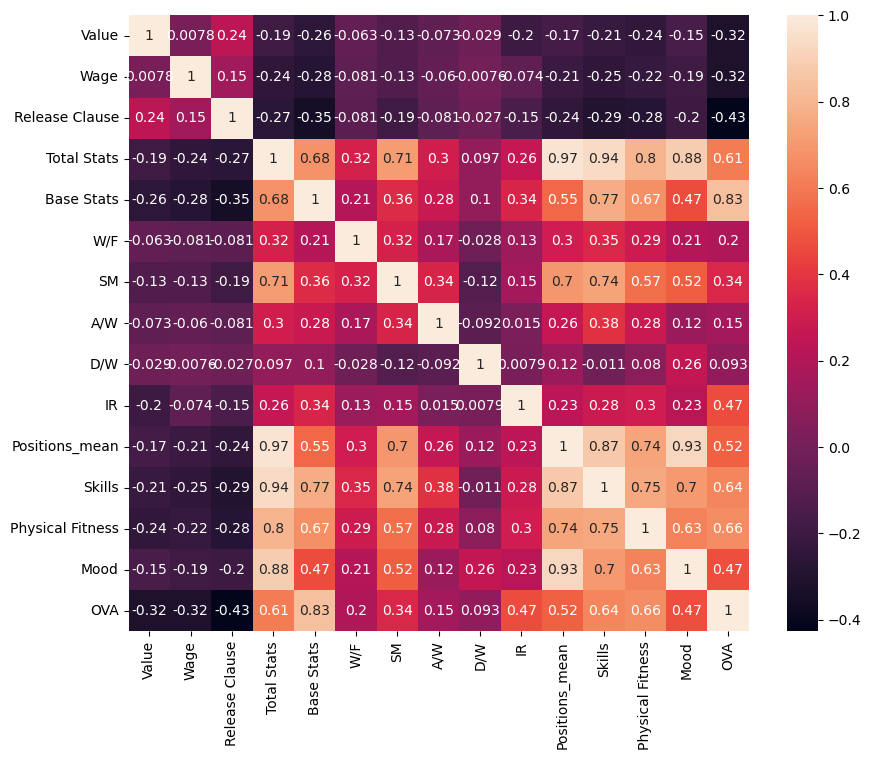

In [41]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numfifa.corr(), annot=True)
plt.show()

In [42]:
#splitting X and y
X=numfifa.drop('OVA', axis=1)
y=numfifa['OVA']

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
transformer = MinMaxScaler().fit(numfifa)
X_norm = transformer.transform(numfifa)
print(numfifa.shape)
X_numfifa_scale = pd.DataFrame(X_norm, columns=numfifa.columns)
X_numfifa_scale.head()

(11701, 15)


,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,Positions_mean,Skills,Physical Fitness,Mood,OVA
0,0.538462,0.004211,0.801802,0.604577,0.492366,0.75,0.25,1.0,0.5,0.00,0.633180,0.503804,0.285714,0.604566,0.472727
1,0.008718,0.024211,0.000000,0.781945,0.702290,0.50,0.75,1.0,0.0,0.25,0.735362,0.765761,0.418458,0.583562,0.709091
2,0.009231,0.051579,0.015315,0.759059,0.671756,0.75,0.75,1.0,0.5,0.25,0.749713,0.771739,0.360936,0.621005,0.763636
3,0.282051,0.004211,0.694695,0.506039,0.385496,0.25,0.25,0.5,0.5,0.00,0.560850,0.404348,0.223135,0.562557,0.381818
4,0.743590,0.002105,0.001401,0.593134,0.503817,0.25,0.50,0.0,0.5,0.00,0.662457,0.498370,0.242099,0.657534,0.490909


In [45]:
catfifa = pd.DataFrame({'BP': fifa['BP'], 'Age Group': fifa['Age Group']})
catfifa.head()

,BP,Age Group
0,CM,25-30
1,ST,30-35
2,CAM,30-35
3,CDM,20-25
4,CDM,20-25


In [46]:
catfifa['Age Group'].value_counts(dropna=False)

Age Group
20-25       4295
25-30       3503
30-35       2020
15-20       1414
Above 35     469
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(catfifa)  
encoded = encoder.transform(catfifa).toarray() 
encoded_columns = OneHotEncoder(drop='first').fit(catfifa).get_feature_names_out(input_features=catfifa.columns) 

onehot_encoded_X = pd.DataFrame(encoded, columns = encoded_columns) 
onehot_encoded_X.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,Age Group_20-25,Age Group_25-30,Age Group_30-35,Age Group_Above 35
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
concfifa= pd.concat([onehot_encoded_X, X_numfifa_scale ], axis=1)
concfifa.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,Age Group_20-25,Age Group_25-30,Age Group_30-35,Age Group_Above 35,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,Positions_mean,Skills,Physical Fitness,Mood,OVA
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.538462,0.004211,0.801802,0.604577,0.492366,0.75,0.25,1.0,0.5,0.00,0.633180,0.503804,0.285714,0.604566,0.472727
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.008718,0.024211,0.000000,0.781945,0.702290,0.50,0.75,1.0,0.0,0.25,0.735362,0.765761,0.418458,0.583562,0.709091
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.009231,0.051579,0.015315,0.759059,0.671756,0.75,0.75,1.0,0.5,0.25,0.749713,0.771739,0.360936,0.621005,0.763636
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.282051,0.004211,0.694695,0.506039,0.385496,0.25,0.25,0.5,0.5,0.00,0.560850,0.404348,0.223135,0.562557,0.381818
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.743590,0.002105,0.001401,0.593134,0.503817,0.25,0.50,0.0,0.5,0.00,0.662457,0.498370,0.242099,0.657534,0.490909


In [49]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

In [50]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test) 

In [51]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.7950724391191009 -- test R2: 0.8038723846059042


In [52]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 9.702429194459791 -- test MSE: 9.217019661939421


In [53]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 3.114872259733903 -- test RMSE: 3.035954489438111


In [54]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 9.702429194459791 -- test MAE: 9.217019661939421


In [55]:
fifa2 = pd.read_csv('fifa21_validate.csv')
fifa2.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [56]:
bins = [15, 20, 25, 30, 35, float('inf')]
labels = ['15-20', '20-25', '25-30', '30-35', 'Above 35']
fifa2['Age Group'] = pd.cut(fifa2['Age'], bins=bins, labels=labels, right=False)

In [57]:
mapping2 = {'High': 3, 'Medium': 2, 'Low': 1, np.nan: 2}
columns_to_replace2 = ['A/W', 'D/W']
fifa2[columns_to_replace2] = fifa2[columns_to_replace2].replace(mapping2)


In [58]:
fifa2['Value'] = fifa2['Value'].str.replace('K', '').str.replace('M', '').str.replace('€', '')
fifa2['Wage'] = fifa2['Wage'].str.replace('K', '').str.replace('M', '').str.replace('€', '')
fifa2['Release Clause'] = fifa2['Release Clause'].str.replace('K', '').str.replace('M', '').str.replace('€', '')
fifa2['Hits'] = fifa2['Hits'].str.replace('K', '').str.replace('M', '')

In [59]:
for col in fifa2[['W/F', 'SM', 'IR']]:
    fifa2[col] = fifa2[col].str.rstrip('★').astype('int64')

In [60]:
def replace_values(value):
    if isinstance(value, str) and '+' in value:
        parts = value.split('+')
        return sum(int(part) for part in parts)
    else:
        return value
fifa2 = fifa2.applymap(replace_values)
fifa2.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Age Group
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",975,5,0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2,2,1.0,3.0,1,64,30,50,50,66,74,34,50,50,50,48,47,47,47,48,50,50,50,52,53,53,53,52,61,63,63,63,61,63,69,69,69,63,18,67,20-25
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,1.2,3,2.2,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4,3,3.0,1.0,1,74,67,62,74,24,57,12,66,66,66,68,68,68,68,68,70,70,70,69,63,63,63,69,51,49,49,49,51,47,40,40,40,47,19,68,20-25
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,120,500,249,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2,1,2.0,2.0,1,56,52,53,55,26,53,3,20,20,20,15,17,17,17,15,19,19,19,18,20,20,20,18,18,20,20,20,18,18,20,20,20,18,55,54,15-20
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,160,500,464,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3,2,2.0,2.0,1,58,34,47,52,53,59,6,48,48,48,47,46,46,46,47,49,49,49,51,51,51,51,51,55,56,56,56,55,55,56,56,56,55,13,55,15-20
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,2.3,13,4.3,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4,2,2.0,2.0,1,67,62,68,70,69,71,45,65,65,65,66,66,66,66,66,70,70,70,69,72,72,72,69,72,74,74,74,72,71,70,70,70,71,20,70,20-25


In [61]:
columns_change2 = ['PAC','SHO','PAS','DRI','DEF','PHY','Hits','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK','Attacking','Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Skill','Dribbling','Curve','FK Accuracy','Long Passing','Ball Control','Movement','Acceleration','Sprint Speed','Agility','Reactions','Balance','Power','Shot Power','Jumping','Stamina','Strength','Long Shots','Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Defending','Marking','Standing Tackle','Sliding Tackle','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK','Positioning','GK Reflexes','Total Stats','Base Stats', 'D/W', 'A/W', 'W/F', 'SM', 'IR']

In [62]:
fifa2['Hits']=fifa2['Hits'].astype(float)

In [63]:
fifa2['Value']=fifa2['Value'].astype(float)

In [64]:
fifa2['Wage']=fifa2['Wage'].astype(float)

In [65]:
fifa2['Release Clause']=fifa2['Release Clause'].astype(float)

In [66]:
numfifa2 = fifa2.select_dtypes(include=['float64', 'int64'])
numfifa2 = numfifa2.drop(columns=['Age'])
numfifa2.head()

,ID,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,7,975.0,5.0,0.0,230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2,2,1.0,3.0,1,64,30,50,50,66,74,34.0,50,50,50,48,47,47,47,48,50,50,50,52,53,53,53,52,61,63,63,63,61,63,69,69,69,63,18,67
1,221896,5,1.2,3.0,2.2,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4,3,3.0,1.0,1,74,67,62,74,24,57,12.0,66,66,66,68,68,68,68,68,70,70,70,69,63,63,63,69,51,49,49,49,51,47,40,40,40,47,19,68
2,247428,17,120.0,500.0,249.0,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2,1,2.0,2.0,1,56,52,53,55,26,53,3.0,20,20,20,15,17,17,17,15,19,19,19,18,20,20,20,18,18,20,20,20,18,18,20,20,20,18,55,54
3,255120,23,160.0,500.0,464.0,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3,2,2.0,2.0,1,58,34,47,52,53,59,6.0,48,48,48,47,46,46,46,47,49,49,49,51,51,51,51,51,55,56,56,56,55,55,56,56,56,55,13,55
4,215556,5,2.3,13.0,4.3,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4,2,2.0,2.0,1,67,62,68,70,69,71,45.0,65,65,65,66,66,66,66,66,70,70,70,69,72,72,72,69,72,74,74,74,72,71,70,70,70,71,20,70


In [67]:
numfifa2.fillna(numfifa2.mean(), inplace=True)

In [68]:
numfifa2.isnull().sum()

ID                  0
Growth              0
Value               0
Wage                0
Release Clause      0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexe

In [69]:
numfifa2.drop_duplicates(keep=False, inplace=True)

In [70]:
numfifa2['Positions_mean'] = numfifa2[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']].mean(axis=1)

In [71]:
numfifa2['Skills'] = numfifa2[['Growth', 'Attacking', 'Finishing', 'Crossing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'PAC','DRI', 'DEF', 'PAS']].mean(axis=1)

In [72]:
numfifa2['Physical Fitness'] = numfifa2[['Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Hits', 'PHY','SHO' ]].mean(axis=1)

In [73]:
numfifa2['Mood']= numfifa2[['Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking']].mean(axis=1)

In [74]:
column_to_d1 = ['ID','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']

In [75]:
column_to_d2= ['Growth', 'Attacking', 'Finishing', 'Crossing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'PAC','DRI', 'DEF', 'PAS']

In [76]:
column_to_d3 = ['Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Hits', 'PHY','SHO' ]

In [77]:
column_to_d4 = ['Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking']

In [78]:
numfifa2.drop(columns=column_to_d1, inplace=True)

In [79]:
numfifa2.drop(columns=column_to_d2, inplace=True)

In [80]:
numfifa2.drop(columns=column_to_d3, inplace=True)

In [81]:
numfifa2.drop(columns=column_to_d4, inplace=True)

In [82]:
numfifa.head()

,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,Positions_mean,Skills,Physical Fitness,Mood,OVA
0,525.0,4.0,801.0,1682,357,4,2,3.0,2.0,1,59.111111,71.517241,79.454545,92.333333,64
1,8.5,23.0,0.0,1961,412,3,4,3.0,1.0,2,65.703704,88.137931,98.545455,89.777778,77
2,9.0,49.0,15.3,1925,404,4,4,3.0,2.0,2,66.629630,88.517241,90.272727,94.333333,80
3,275.0,4.0,694.0,1527,329,2,2,2.0,2.0,1,54.444444,65.206897,70.454545,87.222222,59
4,725.0,2.0,1.4,1664,360,2,3,1.0,2.0,1,61.000000,71.172414,73.181818,98.777778,65


In [83]:
column_order2 = ['Value','Wage','Release Clause', 'Total Stats','Base Stats', 'W/F', 'SM', 'A/W','D/W', 'IR', 'Positions_mean', 'Skills', 'Physical Fitness', 'Mood', 'OVA']

In [84]:
numfifa2 = numfifa2[column_order2]

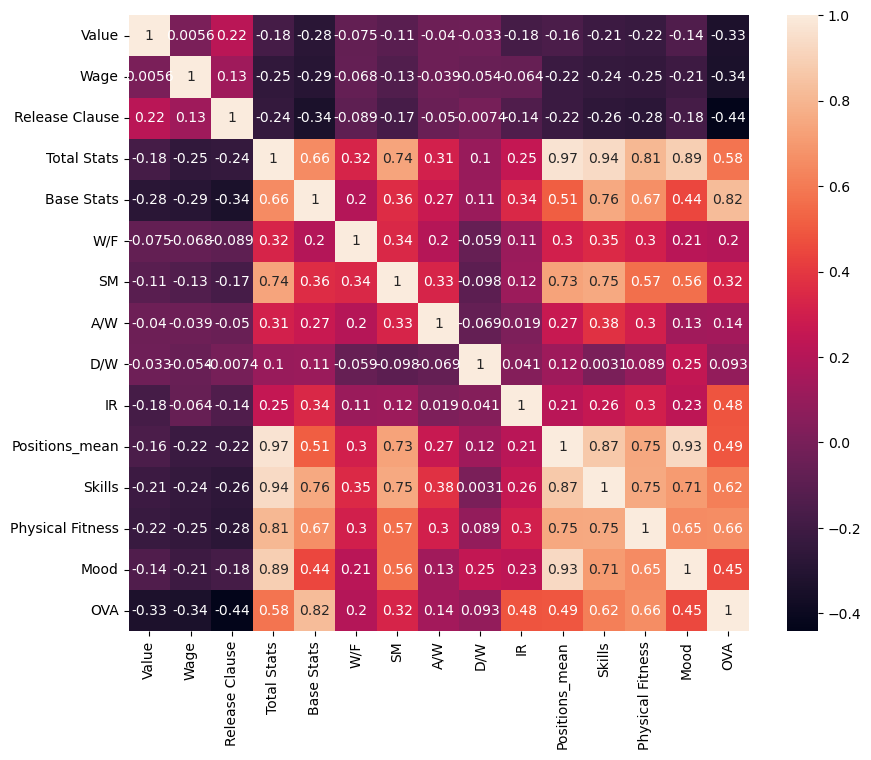

In [85]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numfifa2.corr(), annot=True)
plt.show()

In [86]:
transformer2 = MinMaxScaler().fit(numfifa2)
X_norm2 = transformer2.transform(numfifa2)
print(numfifa2.shape)
X_numfifa_scale2 = pd.DataFrame(X_norm2, columns=numfifa2.columns)
X_numfifa_scale2.head()

(1999, 15)


,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,Positions_mean,Skills,Physical Fitness,Mood,OVA
0,1.000000,0.005263,0.000000,0.526038,0.338710,0.25,0.25,0.0,1.0,0.0,0.572372,0.442766,0.257717,0.589815,0.441860
1,0.001231,0.003158,0.002202,0.641397,0.435484,0.75,0.50,1.0,0.0,0.0,0.629429,0.651365,0.328787,0.504630,0.465116
2,0.123077,0.526316,0.249249,0.036256,0.181452,0.25,0.00,0.5,0.5,0.0,0.019219,0.049971,0.044508,0.042593,0.139535
3,0.164103,0.526316,0.464464,0.413975,0.213710,0.50,0.25,0.5,0.5,0.0,0.503303,0.353283,0.156497,0.517593,0.162791
4,0.002359,0.013684,0.004304,0.732367,0.633065,0.75,0.25,0.5,0.5,0.0,0.791592,0.681580,0.362527,0.742593,0.511628


In [87]:
catfifa2 = pd.DataFrame({'BP': fifa['BP'], 'Age Group': fifa['Age Group']})
catfifa2.head()

,BP,Age Group
0,CM,25-30
1,ST,30-35
2,CAM,30-35
3,CDM,20-25
4,CDM,20-25


In [88]:
from sklearn.preprocessing import OneHotEncoder

encoder2 = OneHotEncoder(drop='first').fit(catfifa2)  
encoded2 = encoder2.transform(catfifa2).toarray() 
encoded_columns2 = OneHotEncoder(drop='first').fit(catfifa2).get_feature_names_out(input_features=catfifa2.columns) 

onehot_encoded_X2 = pd.DataFrame(encoded, columns = encoded_columns2) 
onehot_encoded_X2.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,Age Group_20-25,Age Group_25-30,Age Group_30-35,Age Group_Above 35
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
concfifa2= pd.concat([onehot_encoded_X2, X_numfifa_scale2 ], axis=1)
concfifa2.head()

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,Age Group_20-25,Age Group_25-30,Age Group_30-35,Age Group_Above 35,Value,Wage,Release Clause,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,Positions_mean,Skills,Physical Fitness,Mood,OVA
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.005263,0.000000,0.526038,0.338710,0.25,0.25,0.0,1.0,0.0,0.572372,0.442766,0.257717,0.589815,0.441860
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.001231,0.003158,0.002202,0.641397,0.435484,0.75,0.50,1.0,0.0,0.0,0.629429,0.651365,0.328787,0.504630,0.465116
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.123077,0.526316,0.249249,0.036256,0.181452,0.25,0.00,0.5,0.5,0.0,0.019219,0.049971,0.044508,0.042593,0.139535
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.164103,0.526316,0.464464,0.413975,0.213710,0.50,0.25,0.5,0.5,0.0,0.503303,0.353283,0.156497,0.517593,0.162791
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002359,0.013684,0.004304,0.732367,0.633065,0.75,0.25,0.5,0.5,0.0,0.791592,0.681580,0.362527,0.742593,0.511628


In [90]:
X2=numfifa2.drop('OVA', axis=1)
y2=numfifa2['OVA']

In [91]:
y_pred_linreg2 =linreg.predict(X2) 

In [92]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X2, y2)))

train R2: 0.7950724391191009 -- test R2: 0.7998998564639733


In [93]:
train_mse2 =mse(linreg.predict(X_train), y_train)
test_mse2 =mse(linreg.predict(X2), y2)

print ('train MSE2: {} -- test MSE2: {}'.format(train_mse2, test_mse2))

train MSE2: 9.702429194459791 -- test MSE2: 9.156878924659313


In [94]:
print ('train RMSE2: {} -- test RMSE2: {}'.format(train_mse2**.5, test_mse2**.5))

train RMSE2: 3.114872259733903 -- test RMSE2: 3.026033529995878


In [95]:
train_mae2=mae(linreg.predict(X_train), y_train)
test_mae2=mae(linreg.predict(X2), y2)

print ('train MAE2: {} -- test MAE2: {}'.format(train_mse2, test_mse2))

train MAE2: 9.702429194459791 -- test MAE2: 9.156878924659313


In [98]:
#looking at the predictions
display(y2[:5])
display(y_pred_linreg2[:5])

0    67
1    68
2    54
3    55
4    70
Name: OVA, dtype: int64

array([63.74555029, 65.95540758, 57.00423473, 57.97069852, 73.72095172])